In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import math
import statistics as stats
import numpy as np
import scipy.stats
import pandas as pd
from statsmodels.stats import weightstats as stests
from scipy.stats import norm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.gofplots as sm

LAB 2

In [ ]:
data = pd.read_csv('drive/My Drive/Colab/Data.csv', sep=',', na_values=".")
data

,Specimen,VIQ
0,1,3193
1,2,3124
2,3,3153
3,4,3145
4,5,3093
5,6,3466
6,7,3355
7,8,2979
8,9,3182
9,10,3227


A Hypothesis Test for Mean with Variance Unknown

In [ ]:
scipy.stats.ttest_1samp(data['VIQ'], 3200)

Ttest_1sampResult(statistic=0.353451624297281, pvalue=0.7290157143441449)

In [ ]:
CF = 0.95
df = data.size - 1
mean = np.mean(data)
std = scipy.stats.sem(data)

In [ ]:
confidence_interval = scipy.stats.t.interval(CF, df, mean, std)
print(confidence_interval)

(array([   5.63837223, 3148.62545213]), array([  10.36162777, 3272.84121453]))


Based upon the P value results we have a number that is greater than .05. This means we cannot reject the null hypothesis. (1-.729)(100%) = 27%

B Tests of Hypothesis on the Means of Two Normal Distributions, Variances Unknown

In [ ]:
data2 = pd.read_csv('drive/My Drive/Colab/B.csv', sep=',', na_values=".")
data2


,Observation Number,Catalyst 1,Catalyst 2
0,1,91.50,89.19
1,2,94.18,90.95
2,3,92.18,90.46
3,4,95.39,93.21
4,5,91.79,97.19
5,6,89.07,97.04
6,7,94.72,91.07
7,8,89.21,92.75


In [ ]:
scipy.stats.ttest_ind(data2['Catalyst 1'], data2['Catalyst 2'], equal_var=True)

Ttest_indResult(statistic=-0.3535908643461798, pvalue=0.7289136186068217)

The hypothesis listed:
H0: u1=u2
h1: u1 not = u2

With the high P value. We will have to reject the null hypothesis. This is two sided.

C Tests on Variances of Normal Distributions

In [ ]:
x = [74, 76, 74, 69, 58, 71, 66, 65]
y = [78, 79, 75, 66, 63, 70, 66, 67]

In [ ]:
def f_test(x, y):
  x = np.array(x)
  y = np.array(y)
  f = np.var(x, ddof=1)/np.var(y, ddof=1)
  dfn = x.size-1
  dfd = y.size-1
  p = 1-scipy.stats.f.cdf(f, dfn, dfd)
  return f, p

f_test(x, y)

(0.9646317829457366, 0.5183322097160306)

H0: sigma1square = sigma2square
h1: sigma1square not = sigma2square
alpha = 0.05

Since the p value is greater than 0.05. We cannot reject the null hypothesis 

Homework 4

1. With the given data set describe the population of both patches using graphical and numerical methods.

In [ ]:
data3 = pd.read_csv('drive/My Drive/Colab/HW4.csv', sep=',', na_values=".")
data3

,Batch 1,Batch 2
0,1.001,1.000
1,1.005,1.005
2,1.015,1.015
3,1.020,1.005
4,1.010,0.990
5,1.015,1.005
6,1.000,1.015
7,1.010,1.000
8,0.999,1.005
9,1.010,0.990


In [ ]:
#Using describe for both batches with the counts being 50 we have similar descriptive
#statistics for both batches.
data3.describe()

,Batch 1,Batch 2
count,50.000000,50.000000
mean,1.003360,1.003660
std,0.007714,0.007227
min,0.985000,0.990000
25%,0.999000,1.000000
50%,1.001000,1.005000
75%,1.009000,1.006750
max,1.025000,1.019000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf9d385950>,
      dtype=object)

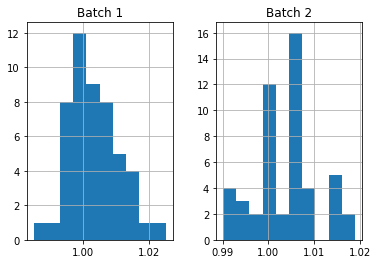

In [ ]:
#This plot gives us a bar chart for both batches.
data3.hist()

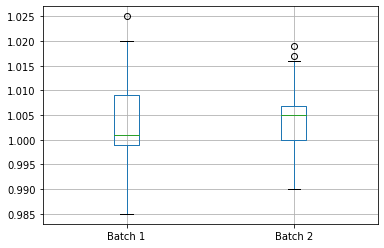

In [ ]:
data3.boxplot()

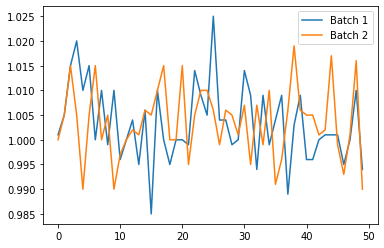

In [ ]:
data3.plot.line()

In [ ]:
#Confidence Interval of Batch 1
CF2 = 0.95
df2 = data3['Batch 1'].size - 1
mean2 = np.mean(data3['Batch 1'])
std2 = scipy.stats.sem(data3['Batch 1'])

In [ ]:
confidence_interval2 = scipy.stats.t.interval(CF2, df2, mean2, std2)
print(confidence_interval2)

(1.0011678046151817, 1.0055521900648183)


In [ ]:
#Confidence Interval of Batch 2
CF3 = 0.95
df3 = data3['Batch 2'].size - 1
mean3 = np.mean(data3['Batch 2'])
std3 = scipy.stats.sem(data3['Batch 2'])

In [ ]:
confidence_interval3 = scipy.stats.t.interval(CF3, df3, mean3, std3)
print(confidence_interval3)

(1.0016061246791232, 1.0057138835608765)


Both batches of data are really similar in terms of the range of numbers. With batch 1 we have a larger amount of numbers centered at 1.025, while also have more different number based on the line graph. While batch 2 has a more even spread of a greater amount of observations over the range of numbers.  

HW4 Question 2

In [ ]:
#Null Hypothesis: mean of batch 1 = mean of batch 2
#mean of batch 1 does not equal mean of batch 2

In [ ]:
scipy.stats.ttest_ind(data3['Batch 1'],data3['Batch 2'], equal_var=True)

Ttest_indResult(statistic=-0.20069320812014202, pvalue=0.8413543932394967)

With the P value of 0.841 with a confidence level of 95%. Since our P value is above that of 0.05. This concludes that we cannot reject the null hypothesis. Meaning the mean of batch 1 and batch 2 do equal one another.

HW4 Question 4.6
H0: u = 100
H1: u < 100

In [ ]:
#   a) t0 = -2.80 [.005, .0025]
#   b) t0 = -1.75 [.05, .025]
#   c) t0 = -2.54 [.01, .005]
#   d) t0 = -2.05 [.05, .025]

HW4 Question 4.11

In [ ]:
data4 = pd.read_csv('drive/My Drive/Colab/4.11.csv', sep=',', na_values=".")
data4

,Wafer,Thickness
0,1,13.3987
1,2,13.3957
2,3,13.3902
3,4,13.4015
4,5,13.4001
5,6,13.3918
6,7,13.3965
7,8,13.3925
8,9,13.3946
9,10,13.4002


In [ ]:
#Testing our hypothesis 
#H0: mu0 = 13.4
#H1: mu0 =/ 13.4
#Alpha = 0.05

scipy.stats.ttest_1samp(data4['Thickness'], 13.4)

In [ ]:
#Defining our variables to find mean and standard deviation 
m1 = np.mean(data4['Thickness'])
std1 = np.std(data4['Thickness'])

In [ ]:
scipy.stats.t.interval(.05, 9, m1, std1)

In [ ]:
fig = sm.qqplot(data4['Thickness'])
plt.show()

4.11 c) The normality assumption does seem reasonable. Using the fat pencil test the points on the graph show us a normal degree of 45 with these points.